In [28]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import solve
import scipy
import time
import math
from scipy.special import erf
from scipy.optimize import fsolve
from matplotlib.colors import LogNorm
import drag_functions_turb as fn

def solve_tri_diag(a,b,c,r):
    
    N = len(a)
    u = np.zeros(N)
    gamma = np.zeros(N)
    
    assert b[0]!=0,"Linearly dependent system of equations"
    beta = b[0]
    u[0] = r[0]/beta
    
    for j in range(1,N):
        gamma[j] = c[j-1]/beta
        beta = b[j] - a[j]*gamma[j]
        
        assert be
        ta!=0,"Zero pivot"
        u[j] = (r[j]-a[j]*u[j-1])/beta
    
    for j in reversed(range(N-1)):
        u[j] -= gamma[j+1]*u[j+1]
        
    return u

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
    

# Note: directory structure here is such that twopoppy files are all contained in the same directory as the notebook in a folder called twopoppy

## Miscellaneous Testing -- Sample run of twopoppy

In [29]:
from twopoppy.const import AU, year, Grav, k_b, mu, m_p
s_yr = 3.154e7

from twopoppy import wrapper
from twopoppy import args
Args = args()
Args.na=6e2
# Args.rc = 20 * AU
# Args.alpha = 1e-2
#res = wrapper.model_wrapper(Args,plot=True)
res = wrapper.model_wrapper_test()


-------------------------------------------------------------------------------
         _____ _    _  _____       ______ ___________      ________   __
        |_   _| |  | ||  _  |      | ___ \  _  | ___ \     | ___ \ \ / /
          | | | |  | || | | |______| |_/ / | | | |_/ /_____| |_/ /\ V /
          | | | |/\| || | | |______|  __/| | | |  __/______|  __/  \ /
          | | \  /\  /\ \_/ /      | |   \ \_/ / |         | |     | |
          \_/  \/  \/  \___/       \_|    \___/\_|         \_|     \_/


This script runs a two-population dust model according to Birnstiel, Klahr,
Ercolano, A&A (2012). The output of the code is described in the README.md file.

Available at: https://github.com/birnstiel/two-pop-py

For bug reports, questions, ... contact birnstiel@mpia.de.

Note:
-----

If you use this code in a publication, please cite at least Birnstiel,
Klahr, & Ercolano, A&A (2012)[1], and possibly Birnstiel et al. (ApJL) 2015[2]
if you use the size distribution reconstruction. I

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/utils.py:186: RuntimeWarning: overflow encountered in multiply
  a_grow = a_grow_prev * np.exp(np.minimum(709.0, dt / tau_grow))


toy model running ... Done!

------------------------------------------------
reconstructing size distribution


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:374: RuntimeWarning: invalid value encountered in sqrt
  (v / cs)**2 + 4 * (1 + d - p) * v / vk * alpha + 4 * alpha * sig_d / sig_g))


------------------------------------------------

                    ALL DONE                    

------------------------------------------------


In [30]:
# ARGS = args()
#This is directly copy/pasted from the twopoppy code

nr       = Args.nr          # noqa
nt       = Args.nt          # noqa
tmax     = Args.tmax        # noqa
n_a      = Args.na          # noqa
alpha    = Args.alpha       # noqa
d2g      = Args.d2g         # noqa
mstar    = Args.mstar       # noqa
tstar    = Args.tstar       # noqa
rstar    = Args.rstar       # noqa
rc       = Args.rc          # noqa
rt       = Args.rt          # noqa
r0       = Args.r0          # noqa
r1       = Args.r1          # noqa
mdisk    = Args.mdisk       # noqa
rhos     = Args.rhos        # noqa
vfrag    = Args.vfrag       # noqa
a0       = Args.a0          # noqa
gamma    = Args.gamma       # noqa
edrift   = Args.edrift      # noqa
estick   = Args.estick      # noqa
gasevol  = Args.gasevol     # noqa
tempevol = Args.tempevol    # noqa
starevol = Args.starevol    # noqa
T        = Args.T           # noqa

SOLD = res.sigma_d
SOLG = res.sigma_g
TI = res.timesteps

Args.print_args()

from twopoppy.distribution_reconstruction import reconstruct_size_distribution

------------------------------------------------
nr                =           2e+02 
nt                =           1e+02 
tmax              =           1e+06 years
d2g               =            0.01 
mstar             =             0.7 solar masses
tstar             =           4e+03 K
rstar             =             1.8 R_sun
rc                =           2e+02 AU
rt                =           1e+06 AU
r0                =            0.05 AU
r1                =           3e+03 AU
mdisk             =             0.1 M_star
rhos              =             1.2 g/cm^3
vfrag             =           1e+03 cm/s
a0                =           1e-05 cm
gamma             =               1 
edrift            =               1 
estick            =               1 
Output directory  =            data
Stokes regime     =             off
Gas         evol. =              on
Temperature evol. =             off
Stellar     evol. =             off
Temperature       =            None
alpha             = 

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


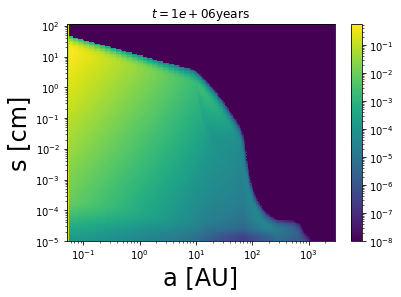

In [31]:
it = -1
sig_sol, a_max, _, _, _, _ = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick)

fig = plt.figure()

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol, norm=LogNorm(),vmin=1e-8)

plt.xscale('log')
plt.yscale('log')
plt.ylabel('s [cm]', fontsize=24)
plt.xlabel('a [AU]', fontsize=24)

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr));

In [32]:
res.Tout-res.T #Checking if Tout is the same as T -- it is for this run since tempevol is False

AttributeError: 'results' object has no attribute 'Tout'

### Plot in Til's Units and Check Integral

#### IDK what any of this is, go down

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


Text(0.5, 1.0, '$t = 1e+06 \\mathrm{years}$')

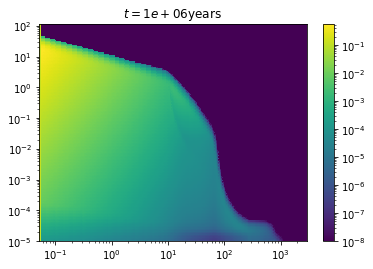

In [33]:
it = -1

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)

fig = plt.figure()

a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol, norm=LogNorm(),vmin=1e-8)

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))

In [34]:
a = res.a

ind = 148
gsf = 2 * (a[ind+1] / a[ind] - 1) / (a[ind+1] / a[ind] + 1)
print(gsf)

0.10922561307043482


/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


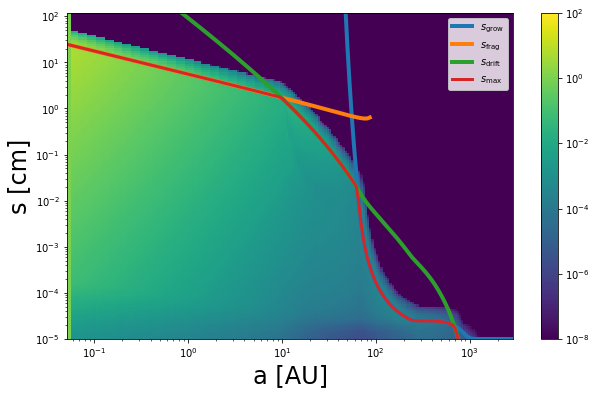

In [35]:
fig = plt.figure(figsize=(10,6))


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)
# plt.loglog(res.x/AU,res.a_fr[it],lw=3)
# plt.loglog(res.x/AU,res.a_df[it],lw=3)
plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$s_\mathrm{max}$')
# plt.loglog(res.x/AU,res.a_fr[it],lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('s [cm]', fontsize=24)
plt.xlabel('a [AU]', fontsize=24)

plt.ylim(np.amin(res.a),np.amax(res.a))

cb = fig.colorbar(im,norm=LogNorm())

plt.gca().legend(loc='best')

In [36]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [37]:
ix = 100
print(res.x[ix]/AU)
cs = np.sqrt(k_b*res.T[ix] / mu / m_p)
vth = (8/np.pi)**(1/2)*cs
Omega = (Grav * Args.mstar / res.x[ix]**3.)**(1/2)
H_g = cs/Omega
rho_g = res.sigma_g[it][ix]/((2*np.pi)**(1/2)*H_g)
vk = res.x[ix]*Omega
eta = cs**2./2/vk**2.

idx = find_nearest_idx(res.a,a_max[ix])

M_dot = 0
for i in np.arange(idx,len(res.a)):
    St = Args.rhos/rho_g*res.a[i]/vth*Omega
    try:
        assert St<1,"Assumptions violated, Stokes number exceeds 1"
    except:
        print(i,St,sig_sol[i,ix]/gsf)
    vr = 2*eta*vk*St
    M_dot += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]

12.59375578299787
125 1.1120749358174882 1.8954925517946476e-99
126 1.2405588707434079 1.8954931523650014e-99
127 1.3838872383620906 1.8954934192028945e-99
128 1.543775094972961 1.8954935112560306e-99
129 1.722135646455904 1.8954935344738998e-99
130 1.9211031415466895 1.8954935384512473e-99
131 2.1430584100943246 1.895493538874111e-99
132 2.3906573518891965 1.8954935388990958e-99
133 2.6668627169570778 1.8954935388998113e-99
134 2.974979557599655 1.8954935388998202e-99
135 3.3186947763979284 1.89549353889982e-99
136 3.7021212434068764 1.8954935388998202e-99
137 4.129847010444421 1.8954935388998194e-99
138 4.606990211369004 1.8954935388998202e-99
139 5.139260305278434 1.8954935388998194e-99
140 5.733026395461352 1.8954935388998202e-99
141 6.395393441600704 1.89549353889982e-99
142 7.134287277178662 1.8954935388998202e-99
143 7.958549449394632 1.89549353889982e-99
144 8.878043016443764 1.8954935388998202e-99
145 9.90377056811795 1.89549353889982e-99
146 11.04800588195488 1.89549353889982

In [38]:
cs = np.sqrt(k_b*res.T / mu / m_p)
vth = (8/np.pi)**(1/2)*cs
Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
H_g = cs/Omega
rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
vk = res.x*Omega
eta = cs**2./2/vk**2.

ix = 100
print(res.x[ix]/AU)



idx = find_nearest_idx(res.a,a_max[ix])

M_dot = 0
for i in np.arange(idx,len(res.a)):
    St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
    try:
        assert St<1,"Assumptions violated, Stokes number exceeds 1"
    except:
        print(i,St,sig_sol[i,ix]/gsf)
    vr = 2*eta[ix]*vk[ix]*St
    M_dot += 2*np.pi*(sig_sol[i,ix]/gsf)*vr*res.x[ix]

12.59375578299787
125 1.1120749358174882 1.8954925517946476e-99
126 1.2405588707434079 1.8954931523650014e-99
127 1.3838872383620906 1.8954934192028945e-99
128 1.543775094972961 1.8954935112560306e-99
129 1.722135646455904 1.8954935344738998e-99
130 1.9211031415466895 1.8954935384512473e-99
131 2.1430584100943246 1.895493538874111e-99
132 2.3906573518891965 1.8954935388990958e-99
133 2.6668627169570778 1.8954935388998113e-99
134 2.974979557599655 1.8954935388998202e-99
135 3.3186947763979284 1.89549353889982e-99
136 3.7021212434068764 1.8954935388998202e-99
137 4.129847010444421 1.8954935388998194e-99
138 4.606990211369004 1.8954935388998202e-99
139 5.139260305278434 1.8954935388998194e-99
140 5.733026395461352 1.8954935388998202e-99
141 6.395393441600704 1.89549353889982e-99
142 7.134287277178662 1.8954935388998202e-99
143 7.958549449394632 1.89549353889982e-99
144 8.878043016443764 1.8954935388998202e-99
145 9.90377056811795 1.89549353889982e-99
146 11.04800588195488 1.89549353889982

In [39]:

# M_dot

In [40]:
M_earth = 5.972e27
M_earth_Myr = 1./M_earth*s_yr*1e6

cs = np.sqrt(k_b*res.T / mu / m_p)
vth = (8/np.pi)**(1/2)*cs
Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
H_g = cs/Omega
rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
vk = res.x*Omega
eta = cs**2./2/vk**2.


M_dot_arr = np.zeros(res.x.shape)
for ix in range(len(res.x)):
   
    print(res.x[ix]/AU)

    idx = find_nearest_idx(res.a,a_max[ix])

    M_dot = 0
    for i in np.arange(idx,len(res.a)):
        St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
#         try:
#             assert St<1,"Assumptions violated, Stokes number exceeds 1"
#         except:
#             print(i,St,sig_sol[i,ix]/gsf)
        vr = 2*eta[ix]*vk[ix]*St
        M_dot += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]
    
    M_dot_arr[ix] = M_dot*M_earth_Myr

0.05141379268928279
0.054321330458579155
0.05739329445355731
0.060638983258048944
0.06406822130667966
0.06769138862262909
0.07151945223711202
0.07556399938568542
0.0798372725818633
0.08435220667420393
0.08912246799903836
0.09416249574735337
0.09948754567104258
0.10511373626081888
0.11105809753556846
0.11733862259082589
0.12397432206240282
0.1309852816700274
0.1383927230151764
0.1462190678171279
0.1544880057816719
0.16322456630791213
0.17245519425021097
0.18220782996460266
0.19251199388196413
0.2033988758639467
0.2149014296121377
0.22705447241622015
0.23989479054306068
0.2534612505857324
0.2677949171095157
0.28293917695097665
0.2989398705463753
0.315845430686919
0.3337070291208607
0.3525787314461948
0.37251766076280324
0.39358417057940953
0.4158420274987136
0.4393586042336821
0.46420508353924406
0.49045667367667173
0.5181928360628331
0.5474975257934059
0.5784594457680902
0.6111723151870302
0.6457351532311687
0.6822525787852125
0.7208351271104471
0.7615995844259263
0.8046693414108121
0.8

(0.1, 100.0)

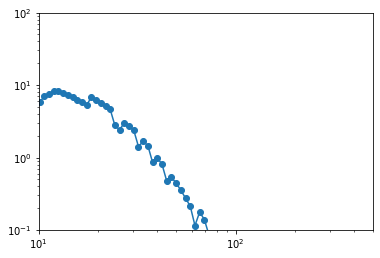

In [41]:
plt.loglog(res.x/AU,M_dot_arr,marker='o')

plt.xlim(1e1,5e2)
plt.ylim(1e-1,1e2)

In [42]:
M_dot_arr

array([3.69831878e+00, 4.00485834e+00, 9.57605988e-01, 1.01148224e+00,
       1.06825377e+00, 1.01161698e+00, 1.06775278e+00, 1.12728977e+00,
       1.19001923e+00, 1.12643435e+00, 1.18887486e+00, 1.25465500e+00,
       1.32394985e+00, 1.25227306e+00, 1.32119538e+00, 1.39378743e+00,
       1.47023950e+00, 1.39068062e+00, 1.46671003e+00, 1.54617929e+00,
       1.63043303e+00, 1.54168190e+00, 1.62541521e+00, 1.71355061e+00,
       1.80631056e+00, 1.70743072e+00, 1.79884084e+00, 1.89572302e+00,
       1.99764525e+00, 1.88762387e+00, 1.98874876e+00, 2.09509584e+00,
       2.20692030e+00, 2.08377356e+00, 2.19456488e+00, 2.31101400e+00,
       2.43339168e+00, 2.29760984e+00, 2.41876246e+00, 2.54498946e+00,
       2.67858811e+00, 2.52799633e+00, 2.66007854e+00, 2.79872061e+00,
       2.94422015e+00, 2.77737122e+00, 2.91977137e+00, 3.07034776e+00,
       3.22823939e+00, 3.04362424e+00, 3.19920999e+00, 3.36224153e+00,
       3.53155395e+00, 3.32755541e+00, 3.49543613e+00, 3.67117139e+00,
      

In [43]:
st_arr = np.zeros(res.x.shape)
Omega_arr = np.zeros(res.x.shape)
vth_arr = np.zeros(res.x.shape)


for ix in range(len(res.x)):
    cs = np.sqrt(k_b*res.T[ix] / mu / m_p)
    vth = (8/np.pi)**(1/2)*cs
    Omega = (Grav * Args.mstar / res.x[ix]**3.)**(1/2)
    H_g = cs/Omega
    rho_g = res.sigma_g[it][ix]/((2*np.pi)**(1/2)*H_g)
    vk = res.x[ix]*Omega
    eta = cs**2./2/vk**2.
    
    idx = find_nearest_idx(res.a,a_max[ix])
    st_arr[ix] = Args.rhos/rho_g*res.a[idx]/vth*Omega
    Omega_arr[ix] = Omega
    vth_arr[ix] = vth
    

(0.05, 500.0)

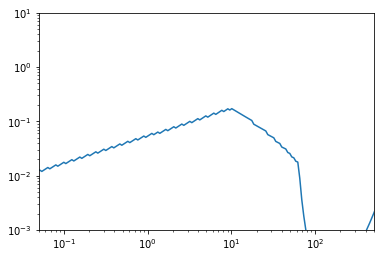

In [44]:
plt.loglog(res.x/AU,st_arr)
plt.ylim(1e-3,1e1)
plt.xlim(5e-2,5e2)

(0.05, 500.0)

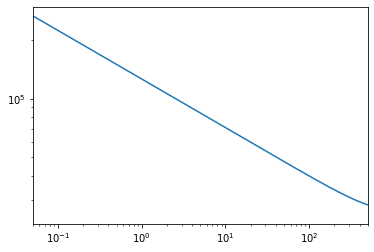

In [45]:
plt.loglog(res.x/AU,vth_arr)
plt.xlim(5e-2,5e2)

In [46]:
# print(a_max[10],find_nearest(res.a,a_max[10]))
print(res.x[10]/AU)
idx = find_nearest_idx(res.a,a_max[10])
print(a_max[10])
print(sig_sol[idx,10]/gsf)
# sig_sol[10]

0.08912246799903836
18.755443909960633
2.295257705838854


In [47]:
for i in np.arange(idx,len(res.a)):
    print(res.a[i])

18.52674058062814
20.667233504696288
23.055028966307198
25.7186991435734
28.690117310383442
32.00483922956296
35.702528610416564
39.82743172164404
44.428906838812
49.56201486170924
55.28817816886837
61.675915593055336
68.80166231238913
76.75068446784492
85.61809945138414
95.51001407340219
106.54479422871621
118.85448125382226


In [48]:
res.a[-1]

118.85448125382226

(1e-05, 100.0)

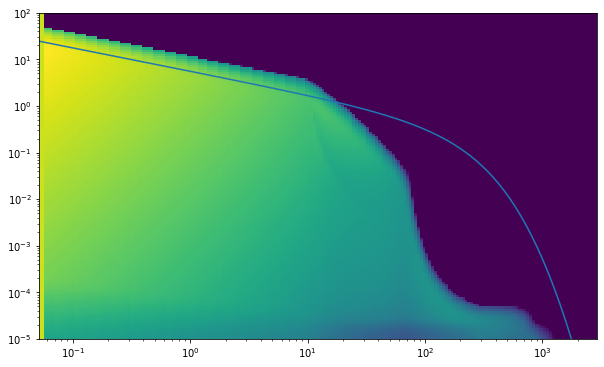

In [52]:
cs = np.sqrt(k_b*res.T / mu / m_p)
a_frag_th = 2/(3*np.pi)*res.sigma_g[it]/Args.rhos/Args.alpha*(Args.vfrag**2.)/(cs**2.)

fig = plt.figure(figsize=(10,6))

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)
plt.loglog(res.x/AU,a_frag_th)
plt.ylim(1e-5,1e2)

### I was trying to check that sig_sol is the actual surface density in a given bin, but this now confuses me. If you look at wrapper.py, what Til actually plots is sig_sol/gsf (gsf is defined above), which he calls $a \cdot \Sigma$, so I would think that is actual surface density in a given bin? But summing over just sig_sol below seems to agree with his dust surface density, so I'm not sure what's up.

In [53]:
nr = sig_sol.shape[1]

sig_d_num = np.zeros(nr)
for i in range(nr):
    sig_d_num[i] = np.sum(sig_sol[:,i])

(1e-05, 10000.0)

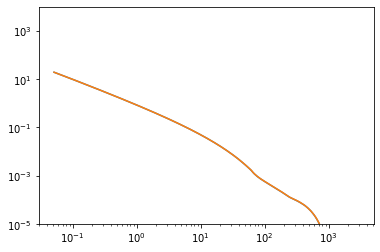

In [54]:
plt.loglog(res.x/AU,sig_d_num)
plt.loglog(res.x/AU,res.sigma_d[it])

plt.ylim(1e-5,1e4)

(1e-05, 100000.0)

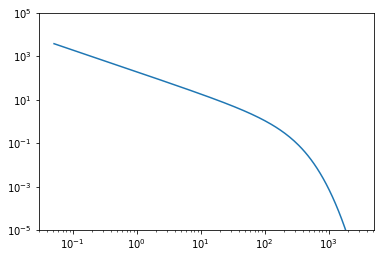

In [55]:
plt.loglog(res.x/AU,res.sigma_g[it])
plt.ylim(1e-5,1e5)

In [56]:
Args.rhos

1.156

In [57]:
for it in np.arange(0,len(res.timesteps),1)[::-10]:

    try:
        sig_sol, _, _, _, _, _ = reconstruct_size_distribution(
            res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick)
        print("index %i worked" %it)
    
    except ValueError:
        print("Broke at index %i" %it)

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


index 99 worked


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


index 89 worked


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


index 79 worked
Broke at index 69
Broke at index 59
Broke at index 49
Broke at index 39
Broke at index 29
Broke at index 19
Broke at index 9


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invali

## Run1: $N_t = 200$, $\alpha = 10^{-3}$, $r_c = 200 \, \mathrm{au}$


-------------------------------------------------------------------------------
         _____ _    _  _____       ______ ___________      ________   __
        |_   _| |  | ||  _  |      | ___ \  _  | ___ \     | ___ \ \ / /
          | | | |  | || | | |______| |_/ / | | | |_/ /_____| |_/ /\ V /
          | | | |/\| || | | |______|  __/| | | |  __/______|  __/  \ /
          | | \  /\  /\ \_/ /      | |   \ \_/ / |         | |     | |
          \_/  \/  \/  \___/       \_|    \___/\_|         \_|     \_/


This script runs a two-population dust model according to Birnstiel, Klahr,
Ercolano, A&A (2012). The output of the code is described in the README.md file.

Available at: https://github.com/birnstiel/two-pop-py

For bug reports, questions, ... contact birnstiel@mpia.de.

Note:
-----

If you use this code in a publication, please cite at least Birnstiel,
Klahr, & Ercolano, A&A (2012)[1], and possibly Birnstiel et al. (ApJL) 2015[2]
if you use the size distribution reconstruction. I

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


------------------------------------------------
plotting results ...
Could not import GUI, will not plot GUI


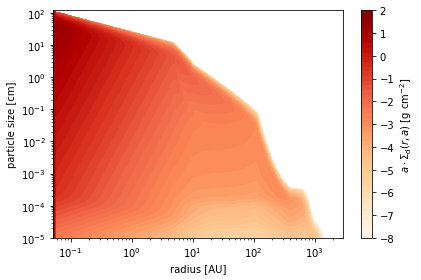

------------------------------------------------

                    ALL DONE                    

------------------------------------------------


In [60]:
from twopoppy.const import AU, year, Grav, k_b, mu, m_p
s_yr = 3.154e7

from twopoppy import wrapper
from twopoppy import args 
Args = args()
Args.na=1000

res = wrapper.model_wrapper(Args,plot=True)

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, um

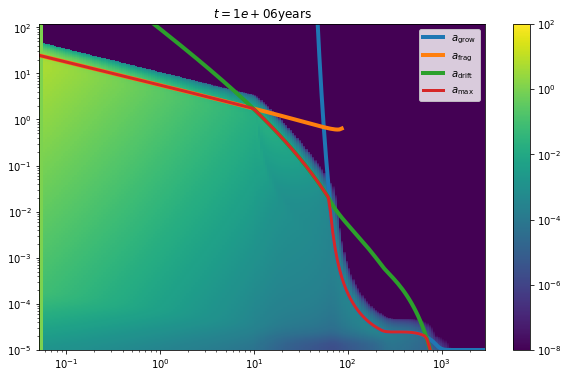

In [63]:
fig = plt.figure(figsize=(10,6))

it = -1 # Not sure what this is

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$s_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')

/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


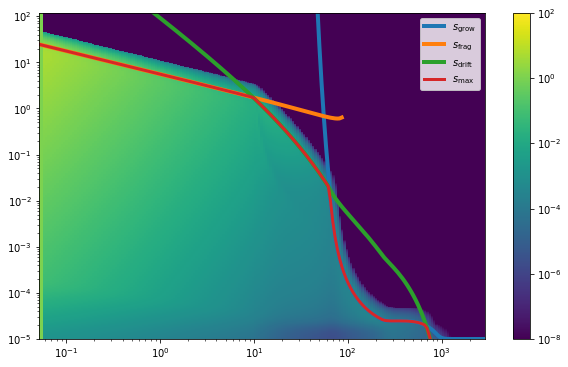

In [64]:
fig = plt.figure(figsize=(10,6))


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)
# plt.loglog(res.x/AU,res.a_fr[it],lw=3)
# plt.loglog(res.x/AU,res.a_df[it],lw=3)
plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$s_\mathrm{max}$')
# plt.loglog(res.x/AU,res.a_fr[it],lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

plt.ylim(np.amin(res.a),np.amax(res.a))

cb = fig.colorbar(im,norm=LogNorm())

plt.gca().legend(loc='best')

In [65]:
M_earth = 5.972e27
M_earth_Myr = 1./M_earth*s_yr*1e6

cs = np.sqrt(k_b*res.T / mu / m_p)
vth = (8/np.pi)**(1/2)*cs
Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
H_g = cs/Omega
rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
vk = res.x*Omega
eta = cs**2./2/vk**2.


M_dot_l_arr = np.zeros(res.x.shape)
M_dot_t_arr = np.zeros(res.x.shape)
for ix in range(len(res.x)):
   
#     print(res.x[ix]/AU)

    idx = find_nearest_idx(res.a,a_max[ix])

    M_dot_large = 0
    M_dot_tot = 0
    for i in np.arange(idx,len(res.a)):
        St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
        vr = 2*eta[ix]*vk[ix]*St
        M_dot_large += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]
        
    for i in range(len(res.a)):
        St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
        vr = 2*eta[ix]*vk[ix]*St
        M_dot_tot += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]
    
    M_dot_l_arr[ix] = M_dot_large*M_earth_Myr
    M_dot_t_arr[ix] = M_dot_tot*M_earth_Myr

In [66]:
def r_g(t):
    ep_d = 0.5/10. #Assuming r_drift/r_0 is 10, and that ep_d,0 = 0.5 in LJ14 notation
    return (3/16)**(1/3)*(Grav * Args.mstar)**(1/3) * (ep_d * Args.d2g)**(2/3) * t**(2/3)

In [67]:
# res.x[find_nearest_idx(res.x/AU,1)]/AU
res.sigma_g.shape

(100, 200)

In [68]:
def M_dot_an(t):
    it = find_nearest_idx(res.timesteps,t)
    ep_d = 0.5/10. #Assuming r_drift/r_0 is 10, and that ep_d,0 = 0.5 in LJ14 notation
    sig_0 = res.sigma_g[it][find_nearest_idx(res.x/AU,1)]
    return (2/3)**(2/3)*np.pi*(Grav * Args.mstar)**(1/3)*(sig_0*AU)*ep_d**(2/3)* Args.d2g**(5/3)*t**(-1/3)*M_earth_Myr

### Ignore these plots

Text(0, 0.5, '$\\dot{M} \\, \\left[ M_\\oplus \\, \\mathrm{Myr}^{-1} \\right]$')

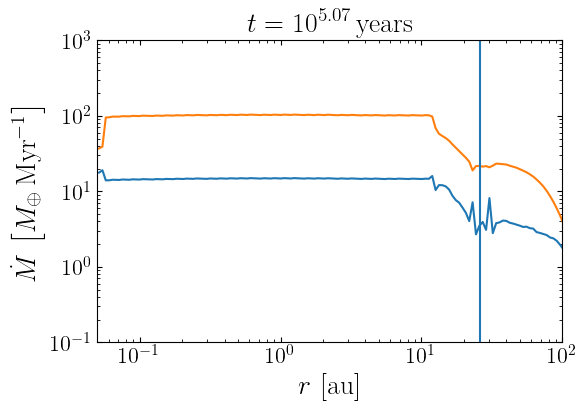

In [216]:
plt.loglog(res.x/AU,M_dot_l_arr)
plt.loglog(res.x/AU,M_dot_t_arr)

plt.xlim(5e-2,1e2)
plt.ylim(1e-1,1e3)

plt.title(r"$t = 10^{%.2f} \, \mathrm{years}$" %np.log10(res.timesteps[it]/s_yr))
plt.axvline(x = r_g(res.timesteps[it])/AU)

plt.xlabel(r'$r \, \left[ \mathrm{au} \right]$')
plt.ylabel(r'$\dot{M} \, \left[ M_\oplus \, \mathrm{Myr}^{-1} \right]$')

In [97]:
def calc_Mdot(t):   
    
    it = find_nearest_idx(res.timesteps/s_yr,t)

    sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
        res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


    a = res.a
    gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)
    
    M_earth = 5.972e27
    M_earth_Myr = 1./M_earth*s_yr*1e6

    cs = np.sqrt(k_b*res.T / mu / m_p)
    vth = (8/np.pi)**(1/2)*cs
    Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
    H_g = cs/Omega
    rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
    vk = res.x*Omega
    eta = cs**2./2/vk**2.


    M_dot_l_arr = np.zeros(res.x.shape)
    M_dot_t_arr = np.zeros(res.x.shape)
    st_max_arr = np.zeros(res.x.shape)
    for ix in range(len(res.x)):

    #     print(res.x[ix]/AU)

        idx = find_nearest_idx(res.a,a_max[ix]*0.5)
        max_idx = find_nearest_idx(res.a,a_max[ix])
        
        st_max_arr[ix] = Args.rhos/rho_g[ix]*res.a[max_idx]/vth[ix]*Omega[ix]

        M_dot_large = 0
        M_dot_tot = 0
        for i in np.arange(idx,len(res.a)):
            St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
            vr = 2*eta[ix]*vk[ix]*St
            M_dot_large += 2*np.pi*(sig_sol[i,ix]/gsf)*vr*res.x[ix]

        for i in range(len(res.a)):
            St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
            vr = 2*eta[ix]*vk[ix]*St
            M_dot_tot += 2*np.pi*(sig_sol[i,ix]/gsf)*vr*res.x[ix]

        M_dot_l_arr[ix] = M_dot_large*M_earth_Myr
        M_dot_t_arr[ix] = M_dot_tot*M_earth_Myr
        
    return M_dot_l_arr,M_dot_t_arr,it,st_max_arr

### Trying to find difference in quantities for largest particle size vs integrated over all sizes

/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:412: RuntimeWarning: overflow encountered in power
  np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:412: RuntimeWarning: overflow encountered in multiply
  np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/Users/michaelrosenthal/Documents/Physic

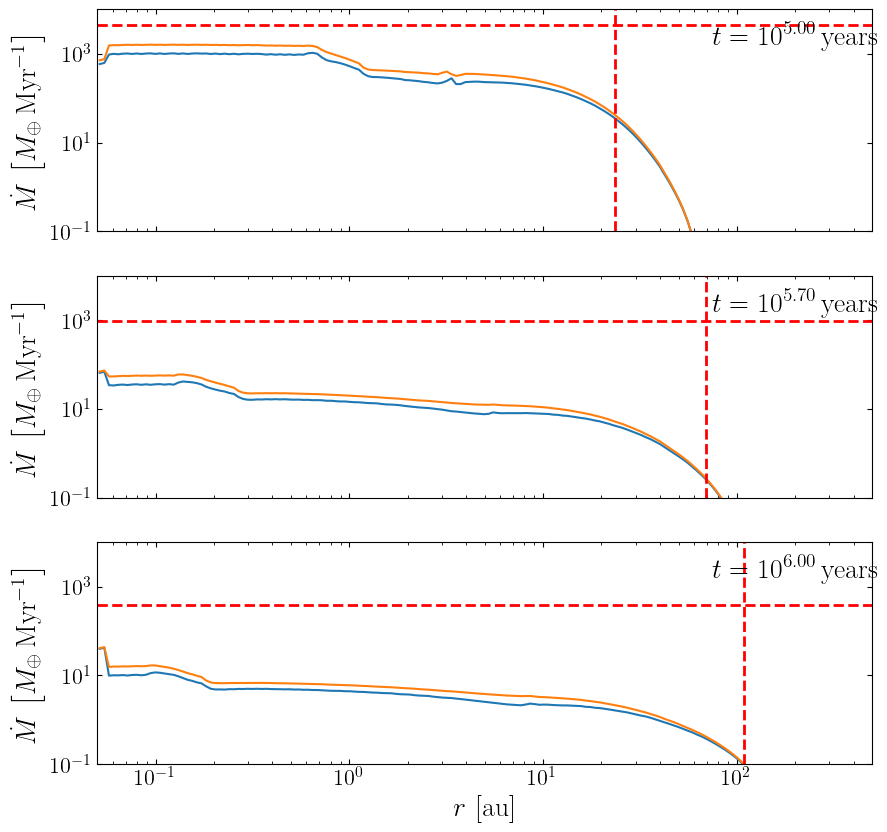

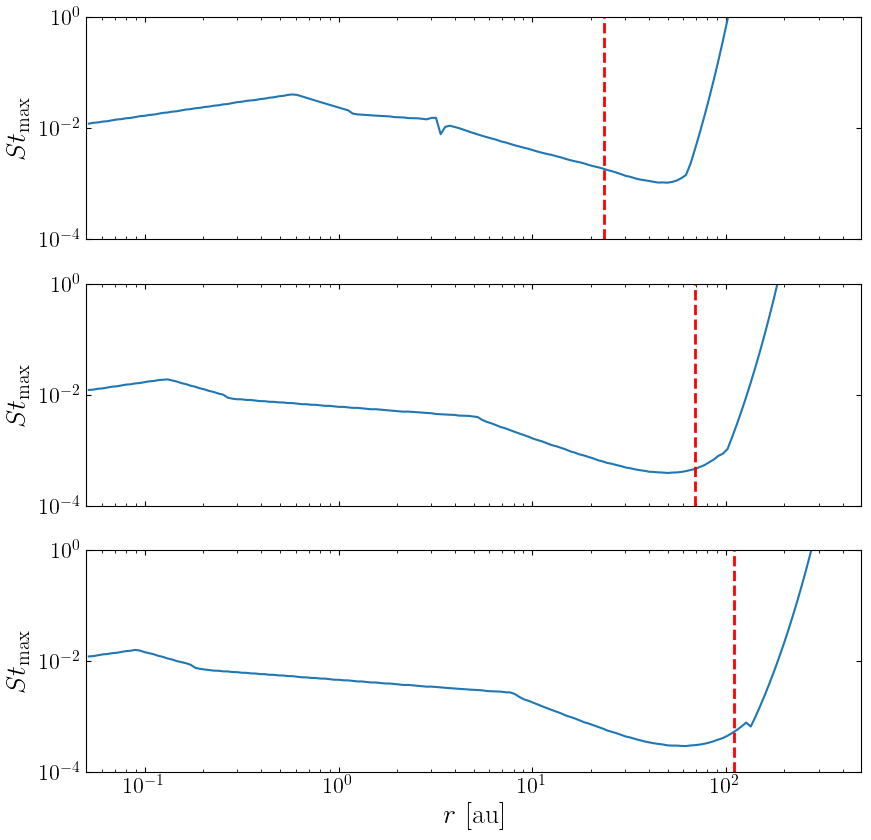

In [98]:
fig, axes = plt.subplots(3,1,sharex=True,figsize=(10,10))
fig_2, axes_st = plt.subplots(3,1,sharex=True,figsize=(10,10))

times = [1e5,5e5,1e6]
st_mx = np.zeros((3,len(res.x)))

for i,(time,ax) in enumerate(zip(times,axes)):
    
    M_l,M_t,it,st_mx[i] = calc_Mdot(time)
    ax_st = axes_st[i]

    ax.loglog(res.x/AU,M_l)
    ax.loglog(res.x/AU,M_t)
    
    ax_st.loglog(res.x/AU,st_mx[i])

    ax.set_xlim(5e-2,5e2)
    ax.set_ylim(1e-1,1e4)
    
    
    ax_st.set_xlim(5e-2,5e2)
    ax_st.set_ylim(1e-4,1e0)

    ax.set_title(r"$t = 10^{%.2f} \, \mathrm{years}$" %np.log10(res.timesteps[it]/s_yr),x=0.9,y=0.80)
    ax.axvline(x = r_g(res.timesteps[it])/AU,lw=2,linestyle='dashed',color='r')
    ax_st.axvline(x = r_g(res.timesteps[it])/AU,lw=2,linestyle='dashed',color='r')
    
    ax.axhline(y = M_dot_an(res.timesteps[it]),lw=2,linestyle='dashed',color='r')
    if i == 2:
        ax.set_xlabel(r'$r \, \left[ \mathrm{au} \right]$')
    ax.set_ylabel(r'$\dot{M} \, \left[ M_\oplus \, \mathrm{Myr}^{-1} \right]$')
    
    if i == 2:
        ax_st.set_xlabel(r'$r \, \left[ \mathrm{au} \right]$')
    ax_st.set_ylabel(r'$St_\mathrm{max}$')

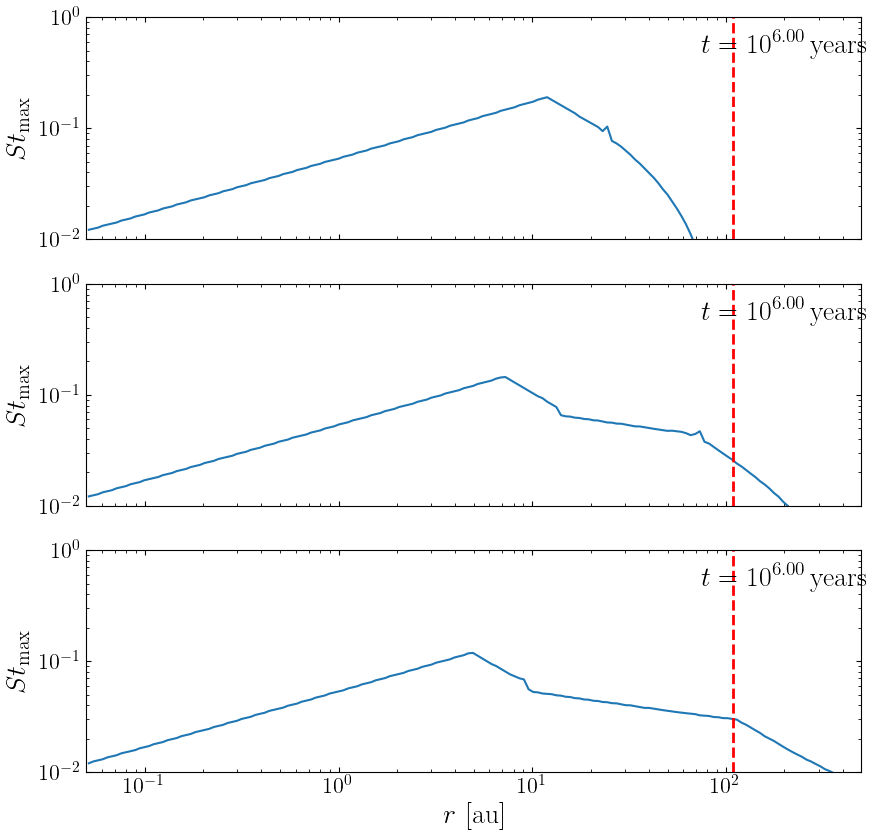

In [279]:
fig_2, axes_st = plt.subplots(3,1,sharex=True,figsize=(10,10))

for i in range(3):
    ax = axes_st[i]
    ax.loglog(res.x/AU,st_mx[i])

    ax.set_xlim(5e-2,5e2)
    ax.set_ylim(1e-2,1e0)

    ax.set_title(r"$t = 10^{%.2f} \, \mathrm{years}$" %np.log10(res.timesteps[it]/s_yr),x=0.9,y=0.80)
    ax.axvline(x = r_g(res.timesteps[it])/AU,lw=2,linestyle='dashed',color='r')
    ax.axhline(y = M_dot_an(res.timesteps[it]),lw=2,linestyle='dashed',color='r')
    if i == 2:
        ax.set_xlabel(r'$r \, \left[ \mathrm{au} \right]$')
    ax.set_ylabel(r'$St_\mathrm{max}$')

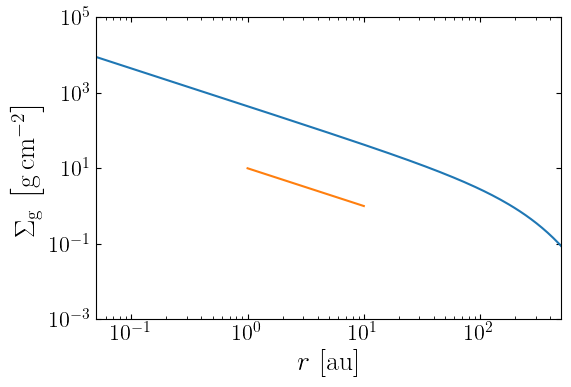

In [264]:
plt.loglog(res.x/AU,res.sigma_g[-1])

plt.xlabel(r'$r \, \left[ \mathrm{au} \right]$')
plt.ylabel(r'$\Sigma_\mathrm{g} \, \left[\mathrm{g} \, \mathrm{cm}^{-2} \right]$')

plt.xlim(5e-2,5e2)
plt.ylim(1e-3,1e5)

plt.plot([1e0,1e1],[1e1,1e0])

### Test $\dot{M}(a)$ in one radial bin

In [82]:
time = 1e5

it = find_nearest_idx(res.timesteps/s_yr,time)

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
        res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)

a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)

M_earth = 5.972e27
M_earth_Myr = 1./M_earth*s_yr*1e6

cs = np.sqrt(k_b*res.T / mu / m_p)
vth = (8/np.pi)**(1/2)*cs
Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
H_g = cs/Omega
rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
vk = res.x*Omega
eta = cs**2./2/vk**2.

ix = find_nearest_idx(res.x/AU,1)

M_dot_a = np.zeros(len(res.a))
for i in range(len(res.a)):
    St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
    vr = 2*eta[ix]*vk[ix]*St
    M_dot_a[i] = 2*np.pi*(sig_sol[i,ix]/gsf)*vr*res.x[ix]*M_earth_Myr

/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:412: RuntimeWarning: overflow encountered in power
  np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/Users/michaelrosenthal/Documents/Physics/Murray-Clay Group/Thesis_Code/rad_drift_PA/tests/two_poppy/distribution_reconstruction.py:412: RuntimeWarning: overflow encountered in multiply
  np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


(1e-11, 1000.0)

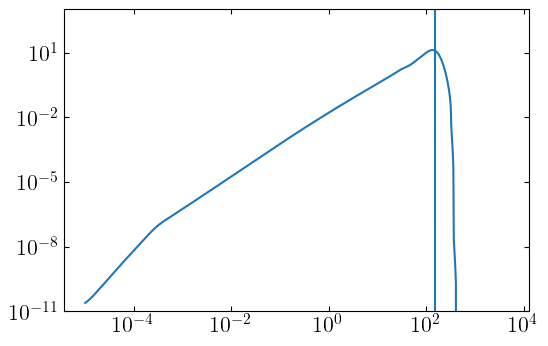

In [91]:
plt.loglog(res.a,M_dot_a)
plt.axvline(x=a_max[ix])

plt.ylim(1e-11,1e3)

(1e-05, 100000.0)

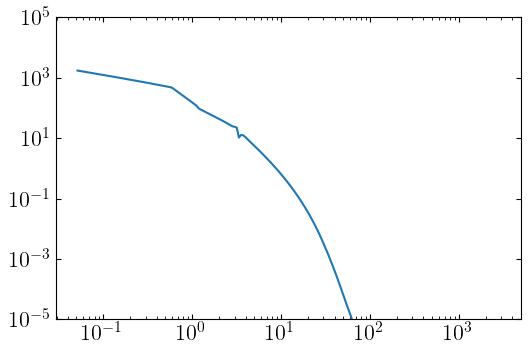

In [90]:
plt.loglog(res.x/AU,a_max)

plt.ylim(1e-5,1e5)

## Run 2: $N_t = 500$, $\alpha = 10^{-3}$, $r_c = 5 \, \mathrm{au}$


-------------------------------------------------------------------------------
         _____ _    _  _____       ______ ___________      ________   __
        |_   _| |  | ||  _  |      | ___ \  _  | ___ \     | ___ \ \ / /
          | | | |  | || | | |______| |_/ / | | | |_/ /_____| |_/ /\ V /
          | | | |/\| || | | |______|  __/| | | |  __/______|  __/  \ /
          | | \  /\  /\ \_/ /      | |   \ \_/ / |         | |     | |
          \_/  \/  \/  \___/       \_|    \___/\_|         \_|     \_/


This script runs a two-population dust model according to Birnstiel, Klahr,
Ercolano, A&A (2012). The output of the code is described in the README.md file.

Available at: https://github.com/birnstiel/two-pop-py

For bug reports, questions, ... contact birnstiel@mpia.de.

Note:
-----

If you use this code in a publication, please cite at least Birnstiel,
Klahr, & Ercolano, A&A (2012)[1], and possibly Birnstiel et al. (ApJL) 2015[2]
if you use the size distribution reconstruction. I

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/utils.py:186: RuntimeWarning: overflow encountered in multiply
  a_grow = a_grow_prev * np.exp(np.minimum(709.0, dt / tau_grow))


toy model running ... Done!
toy model running ... Done!
toy model running ... Done!

------------------------------------------------
reconstructing size distribution


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:374: RuntimeWarning: invalid value encountered in sqrt
  (v / cs)**2 + 4 * (1 + d - p) * v / vk * alpha + 4 * alpha * sig_d / sig_g))


------------------------------------------------
plotting results ...
Could not import GUI, will not plot GUI


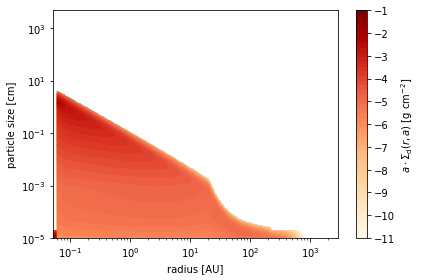

------------------------------------------------

                    ALL DONE                    

------------------------------------------------


In [70]:
from twopoppy.const import AU, year, Grav, k_b, mu, m_p
s_yr = 3.154e7

from twopoppy import wrapper
from twopoppy import args
Args = args() 
Args.na=1000
Args.nt=500
Args.rc= 5 * AU
Args.tmax = 1e7*s_yr

res = wrapper.model_wrapper(Args,plot=True)

In [71]:
# ARGS = args()

nr       = Args.nr          # noqa
nt       = Args.nt          # noqa
tmax     = Args.tmax        # noqa
n_a      = Args.na          # noqa
alpha    = Args.alpha       # noqa
d2g      = Args.d2g         # noqa
mstar    = Args.mstar       # noqa
tstar    = Args.tstar       # noqa
rstar    = Args.rstar       # noqa
rc       = Args.rc          # noqa
rt       = Args.rt          # noqa
r0       = Args.r0          # noqa
r1       = Args.r1          # noqa
mdisk    = Args.mdisk       # noqa
rhos     = Args.rhos        # noqa
vfrag    = Args.vfrag       # noqa
a0       = Args.a0          # noqa
gamma    = Args.gamma       # noqa
edrift   = Args.edrift      # noqa
estick   = Args.estick      # noqa
gasevol  = Args.gasevol     # noqa
tempevol = Args.tempevol    # noqa
starevol = Args.starevol    # noqa
T        = Args.T           # noqa

SOLD = res.sigma_d
SOLG = res.sigma_g
TI = res.timesteps

Args.print_args()

from two_poppy.distribution_reconstruction import reconstruct_size_distribution

------------------------------------------------
nr                =           2e+02 
nt                =           5e+02 
tmax              =           1e+07 years
d2g               =            0.01 
mstar             =             0.7 solar masses
tstar             =           4e+03 K
rstar             =             1.8 R_sun
rc                =               5 AU
rt                =           1e+06 AU
r0                =            0.05 AU
r1                =           3e+03 AU
mdisk             =             0.1 M_star
rhos              =             1.2 g/cm^3
vfrag             =           1e+03 cm/s
a0                =           1e-05 cm
gamma             =               1 
edrift            =               1 
estick            =               1 
Output directory  =            data
Stokes regime     =             off
Gas         evol. =              on
Temperature evol. =             off
Stellar     evol. =             off
Temperature       =            None
alpha             = 

ModuleNotFoundError: No module named 'two_poppy'

In [72]:
Args.rc/AU

5.0

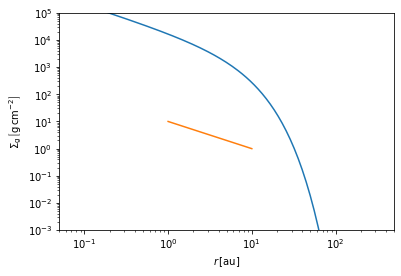

In [73]:
plt.loglog(res.x/AU,res.sigma_g[0])

plt.xlabel(r'$r \, \left[ \mathrm{au} \right]$')
plt.ylabel(r'$\Sigma_\mathrm{g} \, \left[\mathrm{g} \, \mathrm{cm}^{-2} \right]$')

plt.xlim(5e-2,5e2)
plt.ylim(1e-3,1e5)

plt.plot([1e0,1e1],[1e1,1e0])

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in multiply
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.e

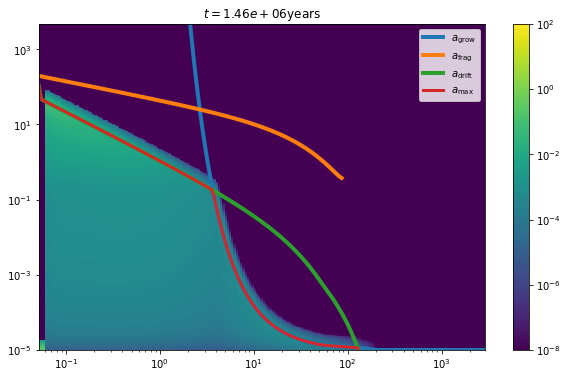

In [74]:
fig = plt.figure(figsize=(10,6))

it = -140

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$a_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$a_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$a_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')

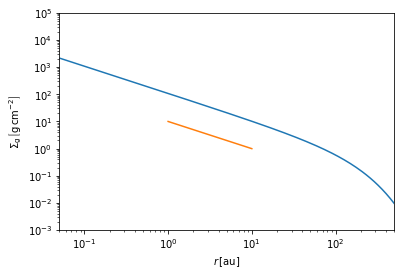

In [75]:
plt.loglog(res.x/AU,res.sigma_g[-1])

plt.xlabel(r'$r \, \left[ \mathrm{au} \right]$')
plt.ylabel(r'$\Sigma_\mathrm{g} \, \left[\mathrm{g} \, \mathrm{cm}^{-2} \right]$')

plt.xlim(5e-2,5e2)
plt.ylim(1e-3,1e5)

plt.plot([1e0,1e1],[1e1,1e0])

In [76]:
def calc_Mdot(t):   
    
    it = find_nearest_idx(res.timesteps/s_yr,t)

    sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
        res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


    a = res.a
    gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)
    
    M_earth = 5.972e27
    M_earth_Myr = 1./M_earth*s_yr*1e6

    cs = np.sqrt(k_b*res.T / mu / m_p)
    vth = (8/np.pi)**(1/2)*cs
    Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
    H_g = cs/Omega
    rho_g = res.sigma_g[it]/((2*np.pi)**(1/2)*H_g)
    vk = res.x*Omega
    eta = cs**2./2/vk**2.


    M_dot_l_arr = np.zeros(res.x.shape)
    M_dot_t_arr = np.zeros(res.x.shape)
    st_max_arr = np.zeros(res.x.shape)
    for ix in range(len(res.x)):

    #     print(res.x[ix]/AU)

        idx = find_nearest_idx(res.a,a_max[ix])
        
        st_max_arr[ix] = Args.rhos/rho_g[ix]*res.a[idx]/vth[ix]*Omega[ix]

        M_dot_large = 0
        M_dot_tot = 0
        for i in np.arange(idx,len(res.a)):
            St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
            vr = 2*eta[ix]*vk[ix]*St
            M_dot_large += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]

        for i in range(len(res.a)):
            St = Args.rhos/rho_g[ix]*res.a[i]/vth[ix]*Omega[ix]
            vr = 2*eta[ix]*vk[ix]*St
            M_dot_tot += 2*np.pi*sig_sol[i,ix]*vr*res.x[ix]

        M_dot_l_arr[ix] = M_dot_large*M_earth_Myr
        M_dot_t_arr[ix] = M_dot_tot*M_earth_Myr
        
    return M_dot_l_arr,M_dot_t_arr,it,st_max_arr

In [77]:
M_earth = 5.972e27
M_earth_Myr = 1./M_earth*s_yr*1e6

def r_g(t):
    ep_d = 0.5/10. #Assuming r_drift/r_0 is 10, and that ep_d,0 = 0.5 in LJ14 notation
    return (3/16)**(1/3)*(Grav * Args.mstar)**(1/3) * (ep_d * Args.d2g)**(2/3) * t**(2/3)

def M_dot_an(t):
    it = find_nearest_idx(res.timesteps,t)
    ep_d = 0.5/10. #Assuming r_drift/r_0 is 10, and that ep_d,0 = 0.5 in LJ14 notation
    sig_0 = res.sigma_g[it][find_nearest_idx(res.x/AU,1)]
    return (2/3)**(2/3)*np.pi*(Grav * Args.mstar)**(1/3)*(sig_0*AU)*ep_d**(2/3)* Args.d2g**(5/3)*t**(-1/3)*M_earth_Myr

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in multiply
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.e

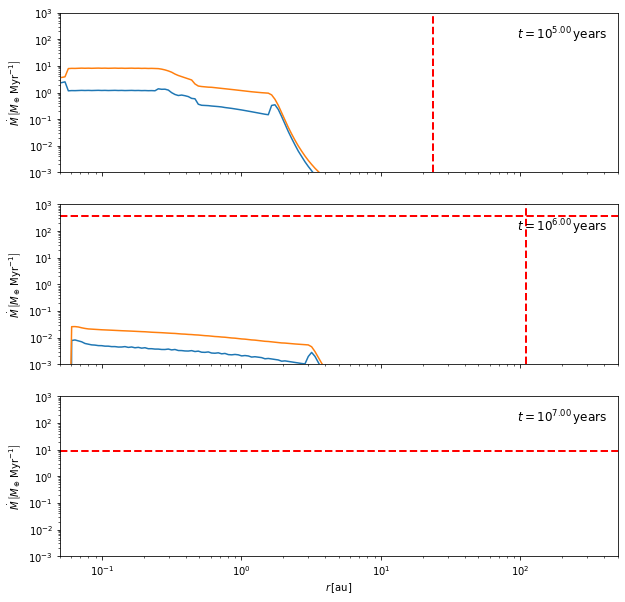

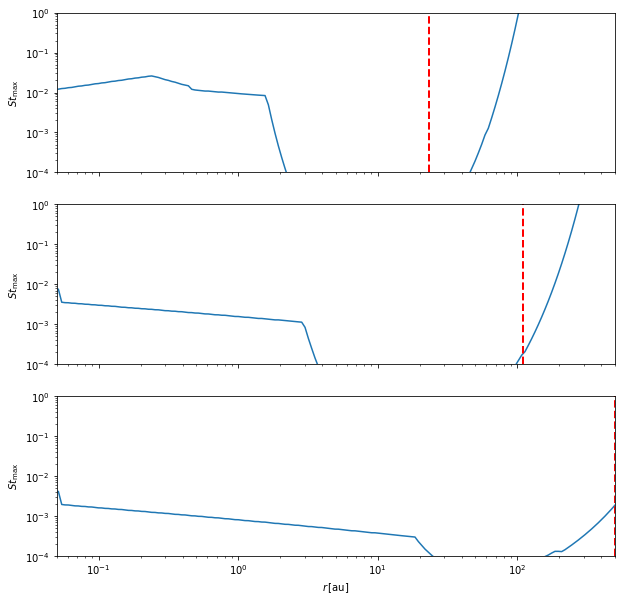

In [78]:
fig, axes = plt.subplots(3,1,sharex=True,figsize=(10,10))
fig_2, axes_st = plt.subplots(3,1,sharex=True,figsize=(10,10))

times = [1e5,1e6,1e7]
st_mx = np.zeros((3,len(res.x)))

for i,(time,ax) in enumerate(zip(times,axes)):
    
    M_l,M_t,it,st_mx[i] = calc_Mdot(time)
    ax_st = axes_st[i]

    ax.loglog(res.x/AU,M_l)
    ax.loglog(res.x/AU,M_t)
    
    ax_st.loglog(res.x/AU,st_mx[i])

    ax.set_xlim(5e-2,5e2)
    ax.set_ylim(1e-3,1e3)
    
    
    ax_st.set_xlim(5e-2,5e2)
    ax_st.set_ylim(1e-4,1e0)

    ax.set_title(r"$t = 10^{%.2f} \, \mathrm{years}$" %np.log10(res.timesteps[it]/s_yr),x=0.9,y=0.80)
    ax.axvline(x = r_g(res.timesteps[it])/AU,lw=2,linestyle='dashed',color='r')
    ax_st.axvline(x = r_g(res.timesteps[it])/AU,lw=2,linestyle='dashed',color='r')
    
    ax.axhline(y = M_dot_an(res.timesteps[it]),lw=2,linestyle='dashed',color='r')
    if i == 2:
        ax.set_xlabel(r'$r \, \left[ \mathrm{au} \right]$')
    ax.set_ylabel(r'$\dot{M} \, \left[ M_\oplus \, \mathrm{Myr}^{-1} \right]$')
    
    if i == 2:
        ax_st.set_xlabel(r'$r \, \left[ \mathrm{au} \right]$')
    ax_st.set_ylabel(r'$St_\mathrm{max}$')

## FT Tau Runs


-------------------------------------------------------------------------------
         _____ _    _  _____       ______ ___________      ________   __
        |_   _| |  | ||  _  |      | ___ \  _  | ___ \     | ___ \ \ / /
          | | | |  | || | | |______| |_/ / | | | |_/ /_____| |_/ /\ V /
          | | | |/\| || | | |______|  __/| | | |  __/______|  __/  \ /
          | | \  /\  /\ \_/ /      | |   \ \_/ / |         | |     | |
          \_/  \/  \/  \___/       \_|    \___/\_|         \_|     \_/


This script runs a two-population dust model according to Birnstiel, Klahr,
Ercolano, A&A (2012). The output of the code is described in the README.md file.

Available at: https://github.com/birnstiel/two-pop-py

For bug reports, questions, ... contact birnstiel@mpia.de.

Note:
-----

If you use this code in a publication, please cite at least Birnstiel,
Klahr, & Ercolano, A&A (2012)[1], and possibly Birnstiel et al. (ApJL) 2015[2]
if you use the size distribution reconstruction. I

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/utils.py:186: RuntimeWarning: overflow encountered in multiply
  a_grow = a_grow_prev * np.exp(np.minimum(709.0, dt / tau_grow))


toy model running ... Done!
toy model running ... Done!
toy model running ... Done!
toy model running ... Done!

------------------------------------------------
reconstructing size distribution


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:374: RuntimeWarning: invalid value encountered in sqrt
  (v / cs)**2 + 4 * (1 + d - p) * v / vk * alpha + 4 * alpha * sig_d / sig_g))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


------------------------------------------------
plotting results ...
Could not import GUI, will not plot GUI


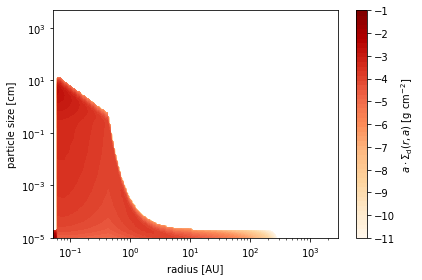

------------------------------------------------

                    ALL DONE                    

------------------------------------------------


In [94]:
from twopoppy.const import AU, year, Grav, k_b, mu, m_p, M_sun
s_yr = 3.154e7

from twopoppy import wrapper
from twopoppy import args 
Args = args()

nri = Args.nr + 1
xi = np.logspace(np.log10(Args.r0), np.log10(Args.r1), nri)
x = 0.5 * (xi[1:] + xi[:-1])

T_0 = 89 #Powell et al. (2019), Table 4
T = T_0*(x/AU)**(-3/7)

mstar = 0.55 * M_sun #Powell et al. (2019), Table 3

sig_0 = 183. #Powell et al. (2019), Table 4
rc = 28. * AU
gamma = 1.07
mdisk = 2*np.pi*sig_0*rc**2./(2-gamma)

Args.T = T
Args.mstar = mstar
Args.mdisk = mdisk
Args.rc = rc
Args.gamma = gamma
Args.gasevol = False

Args.tmax = 1e7*s_yr

Args.nt = 600
# Args.tmax = 1.6e6*s_yr

res = wrapper.model_wrapper(Args,plot=True)

In [95]:
# ARGS = args()

nr       = Args.nr          # noqa
nt       = Args.nt          # noqa
tmax     = Args.tmax        # noqa
n_a      = Args.na          # noqa
alpha    = Args.alpha       # noqa
d2g      = Args.d2g         # noqa
mstar    = Args.mstar       # noqa
tstar    = Args.tstar       # noqa
rstar    = Args.rstar       # noqa
rc       = Args.rc          # noqa
rt       = Args.rt          # noqa
r0       = Args.r0          # noqa
r1       = Args.r1          # noqa
mdisk    = Args.mdisk       # noqa
rhos     = Args.rhos        # noqa
vfrag    = Args.vfrag       # noqa
a0       = Args.a0          # noqa
gamma    = Args.gamma       # noqa
edrift   = Args.edrift      # noqa
estick   = Args.estick      # noqa
gasevol  = Args.gasevol     # noqa
tempevol = Args.tempevol    # noqa
starevol = Args.starevol    # noqa
T        = Args.T           # noqa

SOLD = res.sigma_d
SOLG = res.sigma_g
TI = res.timesteps

Args.print_args()

from twopoppy.distribution_reconstruction import reconstruct_size_distribution

------------------------------------------------
nr                =           2e+02 
nt                =           6e+02 
tmax              =           1e+07 years
d2g               =            0.01 
mstar             =            0.55 solar masses
tstar             =           4e+03 K
rstar             =             1.8 R_sun
rc                =              28 AU
rt                =           1e+06 AU
r0                =            0.05 AU
r1                =           3e+03 AU
mdisk             =             0.2 M_star
rhos              =             1.2 g/cm^3
vfrag             =           1e+03 cm/s
a0                =           1e-05 cm
gamma             =             1.1 
edrift            =               1 
estick            =               1 
Output directory  =            data
Stokes regime     =             off
Gas         evol. =             off
Temperature evol. =             off
Stellar     evol. =             off
Temperature       = [317.52976777 310.13126473 302.90514

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:456: RuntimeWarning: invalid value encountered in double_scalars
  np.log(a[imax] / a[i_full])
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3

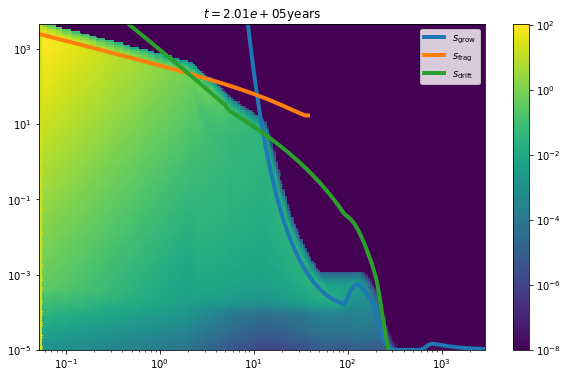

In [96]:
fig = plt.figure(figsize=(10,6))

it = find_nearest_idx(res.timesteps/s_yr,2e5)

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
# plt.loglog(res.x/AU,a_max,lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')

/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


(20, 150)

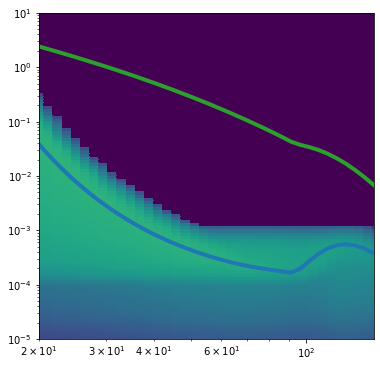

In [97]:
plt.figure(figsize=(6,6))

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$a_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$a_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$a_\mathrm{drift}$')
# plt.loglog(res.x/AU,a_max,lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(1e-5,1e1)

plt.xlim(20,150)

(0.0001, 1000.0)

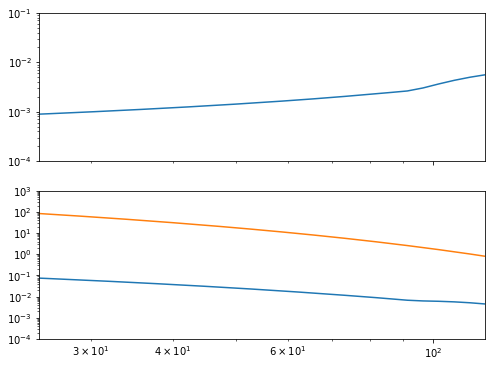

In [98]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(8,6))

ax1.loglog(res.x/AU,res.sigma_d[it]/res.sigma_g[it])
ax1.set_xlim(25,120)
ax1.set_ylim(1e-4,1e-1)

ax2.loglog(res.x/AU,res.sigma_d[it])
ax2.loglog(res.x/AU,res.sigma_g[it])
ax2.set_xlim(25,120)
ax2.set_ylim(1e-4,1e3)

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:374: RuntimeWarning: invalid value encountered in sqrt
  (v / cs)**2 + 4 * (1 + d - p) * v / vk * alpha + 4 * alpha * sig_d / sig_g))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


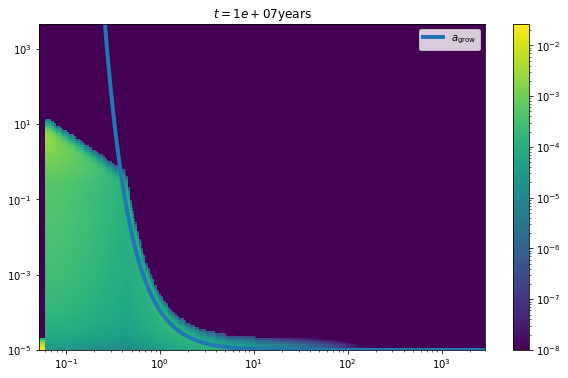

In [99]:
fig = plt.figure(figsize=(10,6))

it = find_nearest_idx(res.timesteps/s_yr,1.6e7)

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

Omega = (Grav * Args.mstar / res.x**3.)**(1/2)
t_grow = res.sigma_g[it]/(Omega*Args.estick*res.sigma_d[it])
a_grow_an = Args.a0*np.exp(res.timesteps[it]/t_grow)
plt.loglog(res.x/AU,a_grow_an,lw=4,label=r'$a_\mathrm{grow}$')

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

# plt.loglog(res.x/AU,a_grow,lw=4,label=r'$a_\mathrm{grow}$')
# plt.loglog(res.x/AU,a_fr,lw=4,label=r'$a_\mathrm{frag}$')
# plt.loglog(res.x/AU,a_dr,lw=4,label=r'$a_\mathrm{drift}$')
# plt.loglog(res.x/AU,a_max,lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')

In [100]:
Args.estick

1.0

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages

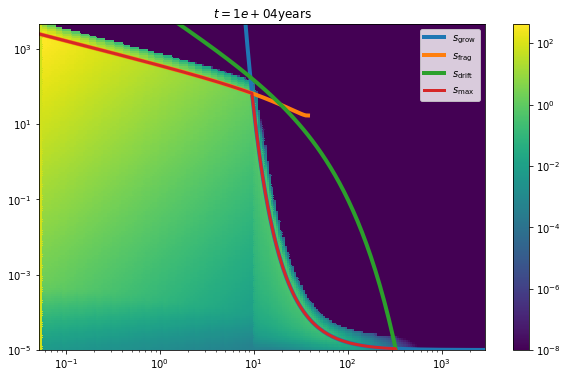

In [101]:
fig = plt.figure(figsize=(10,6))

it = 0

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$s_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')

/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/miniconda3/lib/python3.7/site-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


(20, 150)

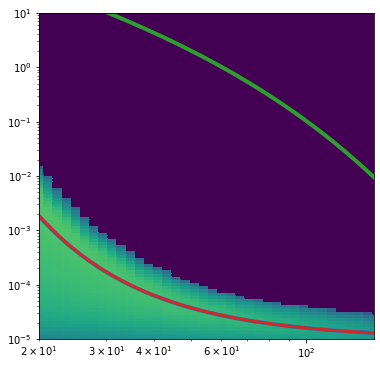

In [102]:
plt.figure(figsize=(6,6))

X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
plt.loglog(res.x/AU,a_max,lw=3,label=r'$s_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(1e-5,1e1)

plt.xlim(20,150)

## DR Tau


-------------------------------------------------------------------------------
         _____ _    _  _____       ______ ___________      ________   __
        |_   _| |  | ||  _  |      | ___ \  _  | ___ \     | ___ \ \ / /
          | | | |  | || | | |______| |_/ / | | | |_/ /_____| |_/ /\ V /
          | | | |/\| || | | |______|  __/| | | |  __/______|  __/  \ /
          | | \  /\  /\ \_/ /      | |   \ \_/ / |         | |     | |
          \_/  \/  \/  \___/       \_|    \___/\_|         \_|     \_/


This script runs a two-population dust model according to Birnstiel, Klahr,
Ercolano, A&A (2012). The output of the code is described in the README.md file.

Available at: https://github.com/birnstiel/two-pop-py

For bug reports, questions, ... contact birnstiel@mpia.de.

Note:
-----

If you use this code in a publication, please cite at least Birnstiel,
Klahr, & Ercolano, A&A (2012)[1], and possibly Birnstiel et al. (ApJL) 2015[2]
if you use the size distribution reconstruction. I

/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/utils.py:186: RuntimeWarning: overflow encountered in multiply
  a_grow = a_grow_prev * np.exp(np.minimum(709.0, dt / tau_grow))


toy model running ... Done!
toy model running ... Done!
toy model running ... Done!
toy model running ... Done!

------------------------------------------------
reconstructing size distribution


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:374: RuntimeWarning: invalid value encountered in sqrt
  (v / cs)**2 + 4 * (1 + d - p) * v / vk * alpha + 4 * alpha * sig_d / sig_g))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))


------------------------------------------------
plotting results ...
Could not import GUI, will not plot GUI


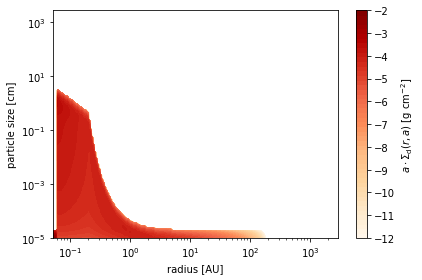

------------------------------------------------

                    ALL DONE                    

------------------------------------------------


In [137]:
from twopoppy.const import AU, year, Grav, k_b, mu, m_p, M_sun
s_yr = 3.154e7

from twopoppy import wrapper
from twopoppy import args 
Args = args()

nri = Args.nr + 1 # Index that corresponds to last argument in semi-major axis array
xi = np.logspace(np.log10(Args.r0), np.log10(Args.r1), nri)
x = 0.5 * (xi[1:] + xi[:-1])

T_0 = 121 #Powell et al. (2019), Table 4
T = T_0*(x/AU)**(-3/7)

mstar = 0.80 * M_sun #Powell et al. (2019), Table 3

sig_0 = 315. #Powell et al. (2019), Table 4
rc = 20. * AU
gamma = 1.0
mdisk = 2*np.pi*sig_0*rc**2./(2-gamma)

Args.T = T
Args.mstar = mstar
Args.mdisk = mdisk
Args.rc = rc
Args.gamma = gamma
Args.vfrag = 1e3
Args.gasevol = False
#Args.stokesregime = True

Args.tmax = 1e7*s_yr

Args.nt = 600
# Args.tmax = 1.6e6*s_yr

res = wrapper.model_wrapper(Args,plot=True)

In [138]:
# ARGS = args()

nr       = Args.nr          # noqa
nt       = Args.nt          # noqa
tmax     = Args.tmax        # noqa
n_a      = Args.na          # noqa
alpha    = Args.alpha       # noqa
d2g      = Args.d2g         # noqa
mstar    = Args.mstar       # noqa
tstar    = Args.tstar       # noqa
rstar    = Args.rstar       # noqa
rc       = Args.rc          # noqa
rt       = Args.rt          # noqa
r0       = Args.r0          # noqa
r1       = Args.r1          # noqa
mdisk    = Args.mdisk       # noqa
rhos     = Args.rhos        # noqa
vfrag    = Args.vfrag       # noqa
a0       = Args.a0          # noqa
gamma    = Args.gamma       # noqa
edrift   = Args.edrift      # noqa
estick   = Args.estick      # noqa
gasevol  = Args.gasevol     # noqa
tempevol = Args.tempevol    # noqa
starevol = Args.starevol    # noqa
T        = Args.T           # noqa

SOLD = res.sigma_d
SOLG = res.sigma_g
TI = res.timesteps

Args.print_args()

from twopoppy.distribution_reconstruction import reconstruct_size_distribution

------------------------------------------------
nr                =           2e+02 
nt                =           6e+02 
tmax              =           1e+07 years
d2g               =            0.01 
mstar             =             0.8 solar masses
tstar             =           4e+03 K
rstar             =             1.8 R_sun
rc                =              20 AU
rt                =           1e+06 AU
r0                =            0.05 AU
r1                =           3e+03 AU
mdisk             =            0.11 M_star
rhos              =             1.2 g/cm^3
vfrag             =           1e+03 cm/s
a0                =           1e-05 cm
gamma             =               1 
edrift            =               1 
estick            =               1 
Output directory  =            data
Stokes regime     =             off
Gas         evol. =             off
Temperature evol. =             off
Stellar     evol. =             off
Temperature       = [431.69777416 421.63913519 411.81486

In [139]:
print(res.a[0], res.a[-1], res.a.size)

1e-05 2684.581647404249 150


/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:213: RuntimeWarning: invalid value encountered in sqrt
  a_fr = sig_g / (pi * rho_s) * (b - np.sqrt(b**2 - 4.))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:30: RuntimeWarning: invalid value encountered in log10
  return 10**(np.interp(np.log10(x_int), np.log10(x), np.log10(R)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in power
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.egg/twopoppy/distribution_reconstruction.py:411: RuntimeWarning: overflow encountered in multiply
  sol2 = np.maximum(sig_3[ia, mask], _sigd * np.exp(A * ((r[mask] / ra)**p[mask] - 1.)))
/miniconda3/lib/python3.7/site-packages/twopoppy-0.0.0-py3.7.e

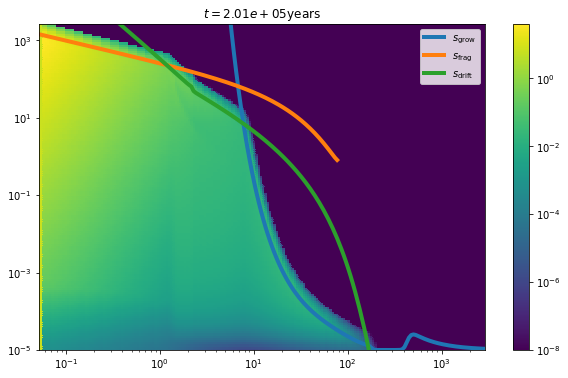

In [140]:
fig = plt.figure(figsize=(10,6))

it = find_nearest_idx(res.timesteps/s_yr,2e5)

a_arr_new = np.logspace(-5, 5, 150) # To replace res.a in below

sig_sol, a_max, _, _, _, _, a_dr, a_fr, a_grow = reconstruct_size_distribution(
    res.x, res.a, TI[it], SOLG[it], SOLD[it], alpha * np.ones(nr), rhos, res.T, mstar, vfrag, a_0=a0, estick=estick,return_a=True)


a = res.a
gsf = 2 * (a[1] / a[0] - 1) / (a[1] / a[0] + 1)


X, Y = np.meshgrid(res.x/AU,res.a)
im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8)

# X, Y = np.meshgrid(res.x/AU,res.a)
# im = plt.pcolormesh(X,Y,sig_sol/gsf, norm=LogNorm(),vmin=1e-8,vmax=1e2)

plt.loglog(res.x/AU,a_grow,lw=4,label=r'$s_\mathrm{grow}$')
plt.loglog(res.x/AU,a_fr,lw=4,label=r'$s_\mathrm{frag}$')
plt.loglog(res.x/AU,a_dr,lw=4,label=r'$s_\mathrm{drift}$')
# plt.loglog(res.x/AU,a_max,lw=3,label=r'$a_\mathrm{max}$')

plt.xscale('log')
plt.yscale('log')

cb = fig.colorbar(im,norm=LogNorm())

im.set_edgecolor('face')

plt.ylim(np.amin(res.a),np.amax(res.a))
#plt.ylim(np.amin(a_arr_new), np.amax(a_arr_new))

plt.title(r"$t = %.3g \mathrm{years}$" %(res.timesteps[it]/s_yr))
plt.gca().legend(loc='best')